In [1]:
## Imports and Initialization -------------------------------------------------|
print("Importing dependencies... ")

import sys
import os, os.path
sys.path.append(os.path.abspath(".."))  # Adjust path to package root

# third party
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# internal
import abstraction
import algorithm
from utility import IndexSchema, get_fits_paths
from examples.fits_to_mp4 import fits_to_mp4
from reference_method import RollingWindow

## Fetch Data ------------------------------------------------------------------

files_dir = os.path.abspath(os.path.join(".", "media", "large"))
files = get_fits_paths(files_dir)
files.sort()
files = files[610:722]
# print("\n".join(files))
print(f"{len(files)} files found")


Importing dependencies... 
112 files found



# Perform Destretching:

In [2]:
# create variable paths for destretching files

kernel_sizes: np.ndarray[np.int64] = np.array([128, 64])
out_off_dir = os.path.join(files_dir, "off")
out_avg_dir = os.path.join(files_dir, "avg")
out_ref_dir = os.path.join(files_dir, "ref")
out_dir = os.path.join(files_dir, "destretched")
print(out_off_dir)
print(out_avg_dir)
print(out_dir)

/home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/off
/home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/avg
/home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/destretched


In [3]:
# calculate offset vectors
print(f"calculating offsets... {out_off_dir}")
abstraction.calc_offset_vectors(
    files,
    out_off_dir,
    "offset",
    kernel_sizes=kernel_sizes,
    ref_method=RollingWindow(files)
)

calculating offsets... /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/off
Searching for image data in specified files...
ref image checksum: 3997123584.0
processing image #0../home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/whitelight.cln.20170621_165941.im06100.seq021.ext221.fits
ref image checksum: 5.8076171875
ref image checksum: 3997123584.0
processing image #1../home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/whitelight.cln.20170621_165941.im06110.seq021.ext231.fits
ref image checksum: 5.8076171875
ref image checksum: 3997123584.0
processing image #2../home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/whitelight.cln.20170621_165941.im06120.seq021.ext241.fits
ref image checksum: 5.8076171875
ref image checksum: 3997123584.0
processing image #3../home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/whitelight.cln.20

In [3]:
# calculate rolling mean
print(f"calculating offset rolling mean... {out_avg_dir}")
abstraction.calc_rolling_mean(
    files,
    out_ref_dir,
    "average"
)


NameError: name 'out_avg_dir' is not defined

In [4]:
# do actual destretch
result = abstraction.destretch_files(
    files,
    get_fits_paths(out_off_dir),
    out_dir,
    in_avg_files=None, # get_fits_paths(out_ref_dir),
)


Searching for image data in specified files...
destretched /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/destretched/destretched000.fits
destretched /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/destretched/destretched001.fits
destretched /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/destretched/destretched002.fits
destretched /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/destretched/destretched003.fits
destretched /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/destretched/destretched004.fits
destretched /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/destretched/destretched005.fits
destretched /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/destretched/destretched006.fits
destretched /home/tteck/Documents/development/flct_destre

In [5]:
# output video files
out_file_orig_vid = os.path.join(files_dir, "video_original.mp4")
out_file_destr_vid = os.path.join(files_dir, "video_destretched.mp4")
out_file_flow_vid = os.path.join(files_dir, "video_flowmap.mp4")
out_file_off_vid = os.path.join(files_dir, "video_offmap.mp4")

# output results as video files
fits_to_mp4(out_dir, out_file_destr_vid, 60, "copper", IndexSchema.XY, 0.2, 1.25)
fits_to_mp4(files, out_file_orig_vid, 60, "copper", IndexSchema.XY, 0.2, 1.25)
fits_to_mp4(out_off_dir, out_file_off_vid, 60, "copper", IndexSchema.XY, 0.2, 1.25, True)
fits_to_mp4(out_avg_dir, out_file_flow_vid, 60, "copper", IndexSchema.XY, 0.2, 1.25, True)

print("Demo Complete!")

Video saved to /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/video_destretched.mp4, with 112 frames
Video saved to /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/video_original.mp4, with 112 frames
Video saved to /home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/video_offmap.mp4, with 112 frames


FileNotFoundError: [Errno 2] No such file or directory: '/home/tteck/Documents/development/flct_destretch/flctdestretch/examples/media/large/avg'

1.858078618035222 5.644137153360596


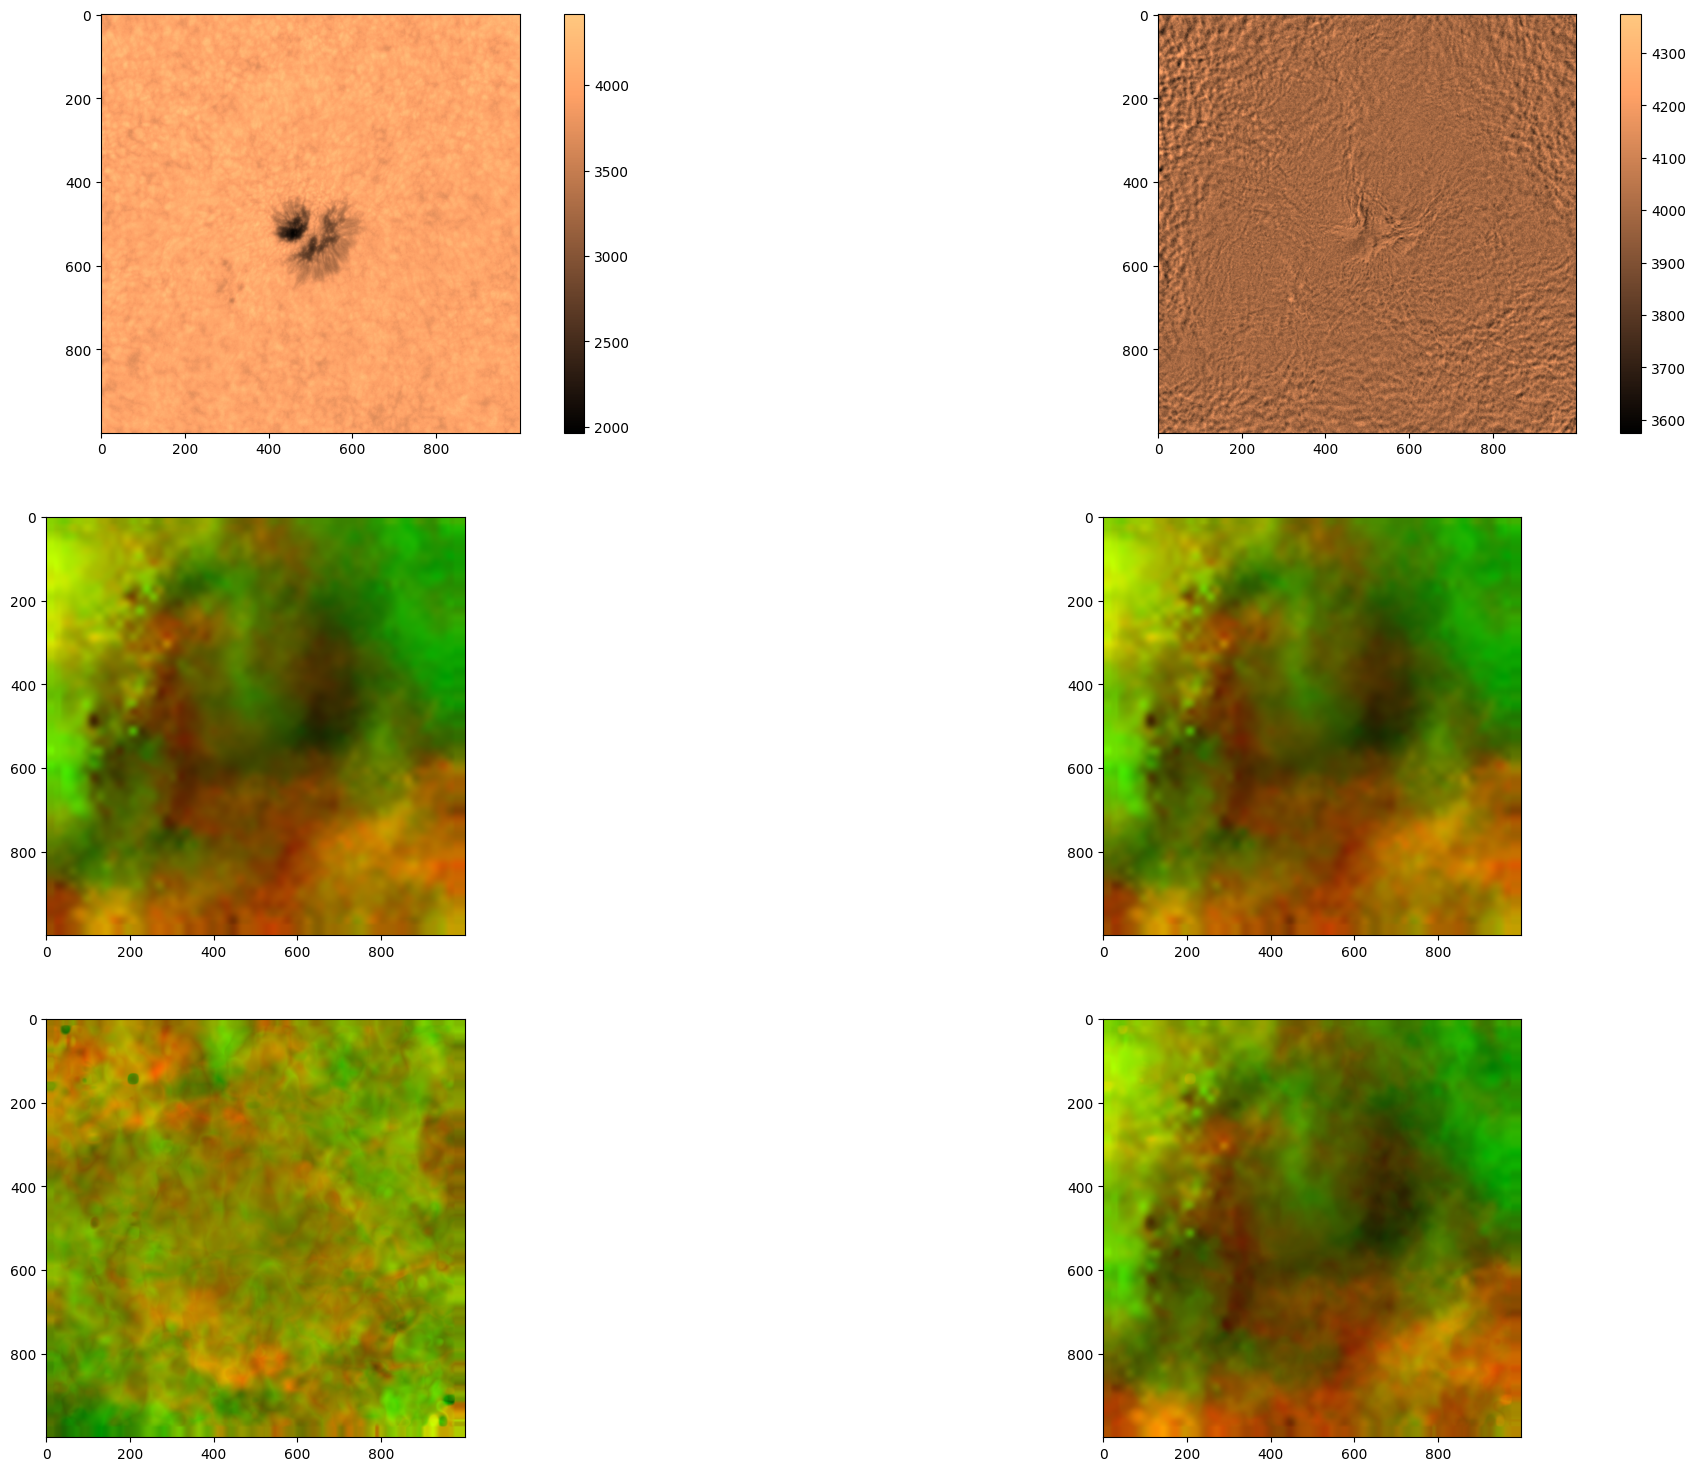

In [34]:
f_index = 1
out_offs = get_fits_paths(out_off_dir)
off1 = fits.open(out_offs[f_index])[0].data
off1_range = off1.max() - off1.min()

avg_offs = get_fits_paths(out_avg_dir)
avg1 = fits.open(avg_offs[f_index])[0].data
avg1_range = avg1.max() - avg1.min()

file0 = fits.open(files[f_index - 1])[0].data
file1 = fits.open(files[f_index])[0].data
_, disp_sum, rdisp_sum, _ = algorithm.reg_loop(file1, file0, [64, 32])
out_off_calced = disp_sum - rdisp_sum
out_off_calced_range = out_off_calced.max() - out_off_calced.min()

plt.figure(figsize=(25,25))
plt.colorbar(plt.subplot(4, 2, 1).imshow(file1, cmap="copper"))
plt.colorbar(plt.subplot(4, 2, 2).imshow(file1 - file0, cmap="copper"))
plt.subplot(4, 2, 3).imshow(
    np.transpose(np.array([
        (off1[0,:,:] - off1.min()) / off1_range,
        (off1[1,:,:] - off1.min()) / off1_range,
        np.zeros((1000,1000)),
    ]), (1,2,0))
)
plt.subplot(4, 2, 4).imshow(
    np.transpose(np.array([
        (out_off_calced[0,:,:] - out_off_calced.min()) / out_off_calced_range,
        (out_off_calced[1,:,:] - out_off_calced.min()) / out_off_calced_range,
        np.zeros((1000,1000)),
    ]), (1,2,0))
)
plt.subplot(4, 2, 5).imshow(
    np.transpose(np.array([
        (avg1[0,:,:] - avg1.min()) / avg1_range,
        (avg1[1,:,:] - avg1.min()) / avg1_range,
        np.zeros((1000,1000)),
	]), (1, 2, 0))
)

corrected_offs = (off1 - avg1)
corrected_offs_range = corrected_offs.max() - corrected_offs.min()
plt.subplot(4, 2, 6).imshow(
    np.transpose(np.array([
        (corrected_offs[0,:,:] - corrected_offs.min()) / corrected_offs_range,
        (corrected_offs[1,:,:] - corrected_offs.min()) / corrected_offs_range,
        np.zeros((1000,1000)),
	]), (1, 2, 0))
)

print(avg1_range, off1_range)
plt.show()

11.591763592729649


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.510511038468409..2.5105843544006348].


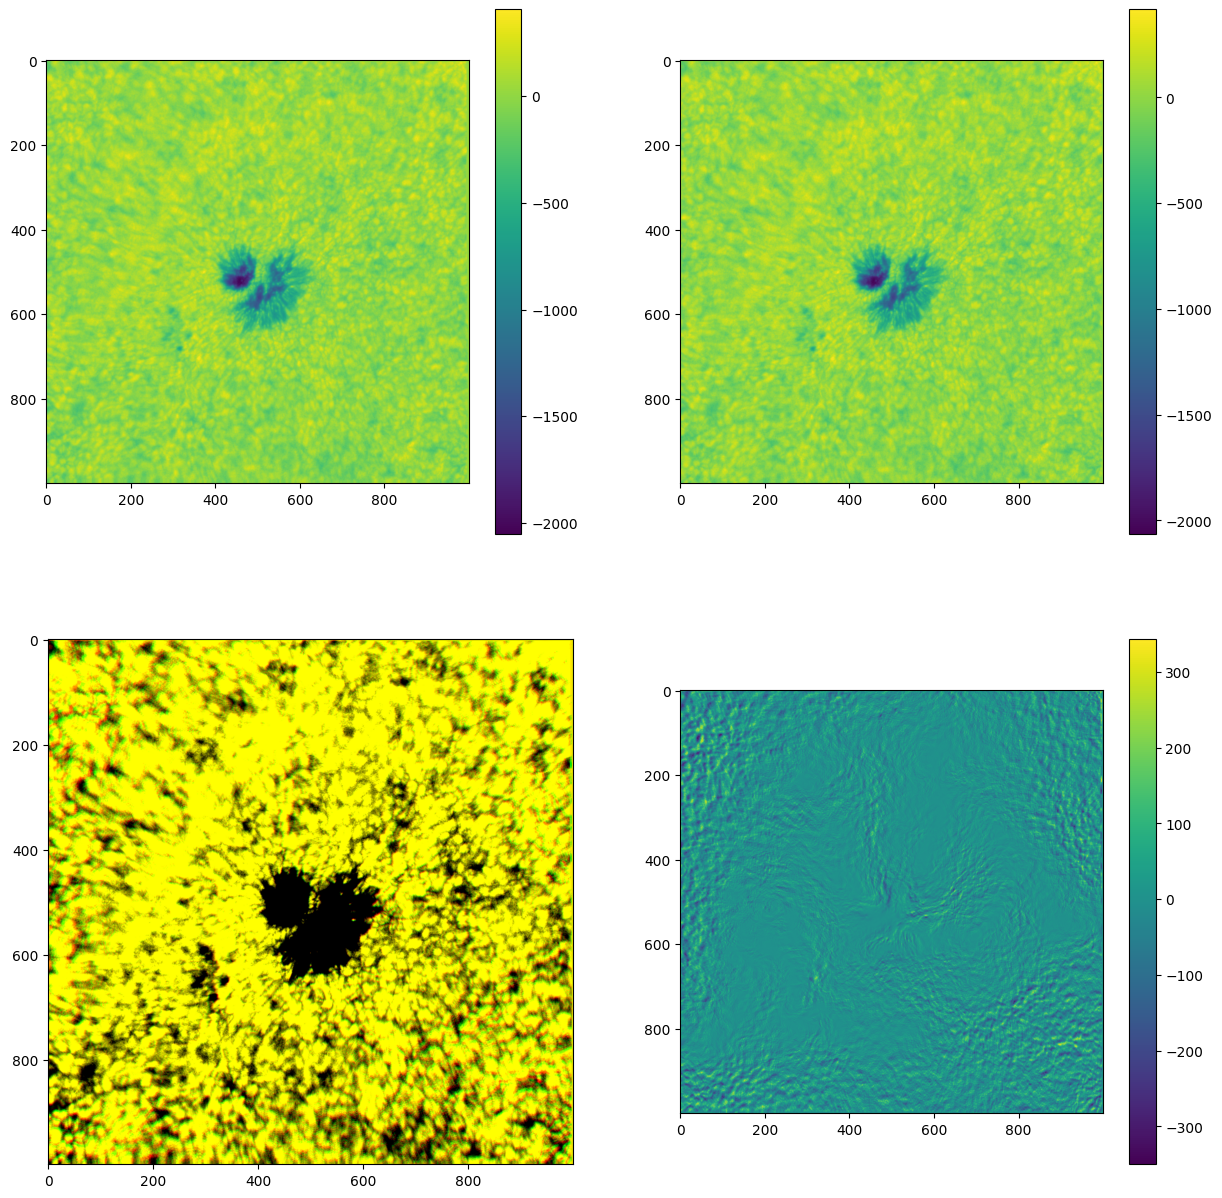

In [35]:


# TODO plt results from manual destretch from reg() vs reg_loop() vs stored

corrected_offs = (avg1 - off1) * 2
destr_params, rdisp = algorithm.destr_control_points(
    file0,
    np.zeros((1,1)),
	border_offset=0, 
    spacing_ratio=0
)

print(corrected_offs.max() - corrected_offs.min())
res1 = algorithm.doreg(file0, rdisp, rdisp - corrected_offs, destr_params)
cmp1 = file0 - res1

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(res1)
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(file0)
plt.colorbar()

file15_range = file0.max() - file0.min()
res1_range = res1.max() - res1.min()
fctr = 0.1

plt.subplot(2,2,3)
plt.imshow(
    np.transpose(np.array([
        (file0 - file0.min() * fctr) / (file15_range * fctr),
        (res1 - res1.min() * fctr) / (res1_range * fctr),
        np.zeros(file0.shape)
    ]), (1,2,0))
)

plt.subplot(2,2,4)
plt.imshow(cmp1)
plt.colorbar()

# is the amount of shifting limited by kernel size?
